In [ ]:
import nltk

In [ ]:
import pandas as pd

data =pd.read_csv("/content/WELFake_Dataset.csv")
data.head()

FileNotFoundError: ignored

In [ ]:
pip install tensorflow

In [ ]:
X_train

array(['Although Tesla CEO Elon Musk shocked Silicon Valley by breaking ranks to become an official member of the White House Manufacturing Jobs Initiative, the value of his Tesla stock is up by over $2 billion since the election of Donald Trump as President. [After a dizzying week of executive orders covering Obamacare, trade and immigration, President Trump held an approval rating of 55 percent of likely voters according to the Rasmussen Reports daily Presidential Tracking Poll. That is only slightly below the 59 percent level of President Obama when he left office.  Voters welcomed President Trump’s decision to scrap the   Partnership (TPP)   deal and agree that the North American Free Trade Agreement (NAFTA) with Mexico and Canada needs to be reworked. Although supporters argue free trade makes products cheaper for U. S. consumers, Americans believe  —   by a whopping 73 percent to 16 percent margin  —    it is more important to keep manufacturing jobs in the United States than kee

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

df = pd.read_csv('WELFake_Dataset.csv')
df['text'] = df['text'].astype(str)
df['text'].fillna('', inplace=True)
max_words = 10000
max_len = 100
X = df['text'].values
y = df['label'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Tokenize and pad sequences
max_words = 10000  # You can adjust this based on your dataset
max_len = 100  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])


#tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))


model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test_pad, y_test)[1]
print(f"Accuracy: {accuracy}")

Epoch 1/5
1804/1804 [==============================] - 189s 103ms/step - loss: 0.1982 - accuracy: 0.9244 - val_loss: 0.1580 - val_accuracy: 0.9407
Epoch 2/5
1804/1804 [==============================] - 184s 102ms/step - loss: 0.1043 - accuracy: 0.9625 - val_loss: 0.1511 - val_accuracy: 0.9469
Epoch 3/5
1804/1804 [==============================] - 183s 102ms/step - loss: 0.0666 - accuracy: 0.9767 - val_loss: 0.1531 - val_accuracy: 0.9475
Epoch 4/5
1804/1804 [==============================] - 182s 101ms/step - loss: 0.0424 - accuracy: 0.9858 - val_loss: 0.1662 - val_accuracy: 0.9473
Epoch 5/5
451/451 [==============================] - 11s 25ms/step - loss: 0.1882 - accuracy: 0.9498
Accuracy: 0.9498163461685181


Epoch 1/5
1804/1804 [==============================] - 194s 108ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.2071 - val_accuracy: 0.9524
Epoch 2/5
1804/1804 [==============================] - 180s 100ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.2096 - val_accuracy: 0.9501
Epoch 3/5
1804/1804 [==============================] - 182s 101ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.2399 - val_accuracy: 0.9517
Epoch 4/5
1804/1804 [==============================] - 185s 102ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.2456 - val_accuracy: 0.9502
Epoch 5/5
1804/1804 [==============================] - 186s 103ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.2555 - val_accuracy: 0.9499


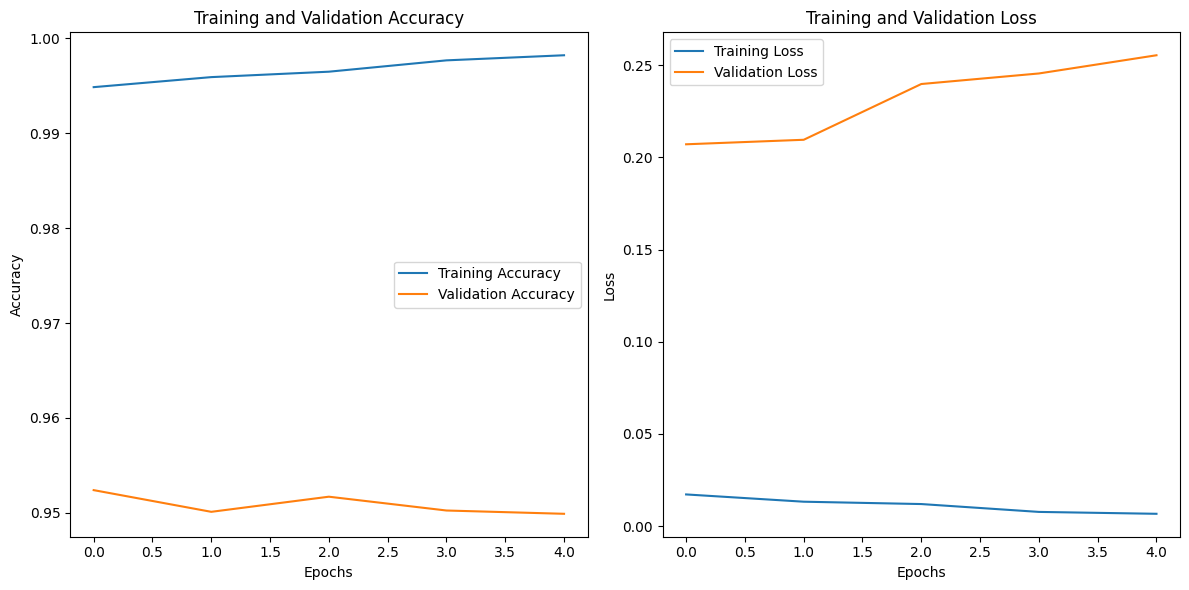

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [ ]:
data.shape

(72134, 4)

In [ ]:
data.drop(columns=['Unnamed: 0','title'],axis=1,inplace=True)

In [ ]:
data

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


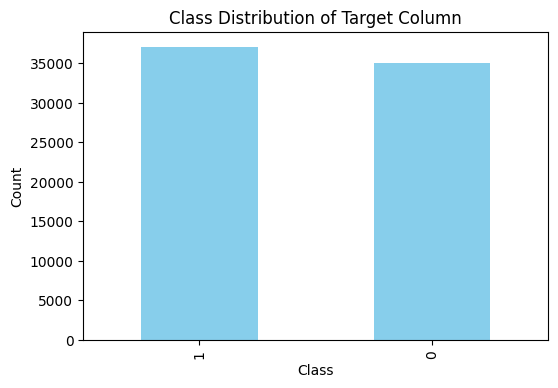

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = data['label'].value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Target Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
data['label'].isna().sum()

0

In [ ]:
data['text'].isna().sum()

39

In [ ]:
data = data.dropna()

In [ ]:
data['text'].isna().sum()

0

In [ ]:
data.shape

(72095, 2)

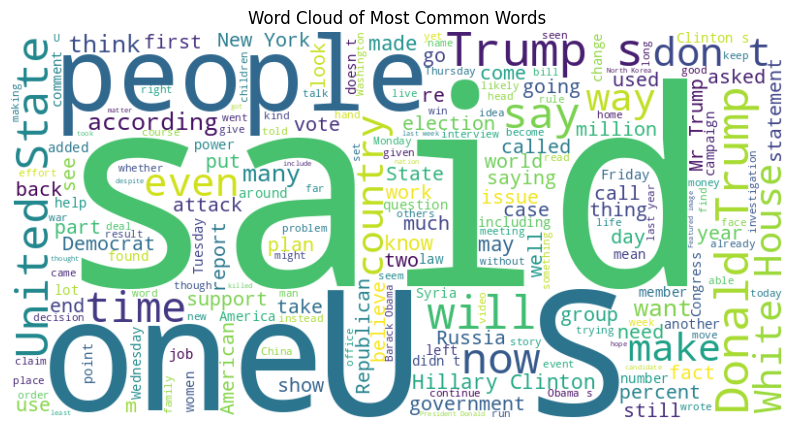

In [ ]:
from wordcloud import WordCloud


text = ' '.join(data['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


In [ ]:
import re
import string

def wordopt(text):
  text=text.lower()
  text=re.sub('\[.*?\]', '',text)
  text=re.sub("\\W", " ",text)
  text=re.sub('https?://\S+|www\.\S+', '',text)
  text=re.sub('<.*?>+', '',text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '',text)
  text=re.sub('\n','',text)
  text=re.sub('w*\d\w*','',text)
  return text

data['text']=data['text'].apply(wordopt)

<ipython-input-26-b15720f0c0c2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].apply(wordopt)


In [ ]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
data

,text,label
0,no comment is expected from barack obama membe...,1
1,did they post their votes for hillary already,1
2,now most of the demonstrators gathered last ...,1
3,a dozen politically active pastors came here f...,0
4,the rs sarmat missile dubbed satan will re...,1
...,...,...
72129,washington reuters hackers believed to be ...,0
72130,you know because in fantasyland republicans n...,1
72131,migrants refuse to leave train at refugee camp...,0
72132,mexico city reuters donald trump s combati...,0


In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


data['text'] = data['text'].apply(lemmatize_text)



<ipython-input-40-7385fc0ad01f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lemmatize_text)


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data

,text,label
0,"[no, comment, is, expected, from, barack, obam...",1
1,"[did, they, post, their, vote, for, hillary, a...",1
2,"[now, most, of, the, demonstrator, gathered, l...",1
3,"[a, dozen, politically, active, pastor, came, ...",0
4,"[the, r, sarmat, missile, dubbed, satan, will,...",1
...,...,...
72129,"[washington, reuters, hacker, believed, to, be...",0
72130,"[you, know, because, in, fantasyland, republic...",1
72131,"[migrant, refuse, to, leave, train, at, refuge...",0
72132,"[mexico, city, reuters, donald, trump, s, comb...",0


In [ ]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'label' is target variable
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(w) for w in words]

# lemmatization on 'X_train' and 'X_test'
X_train = X_train.apply(lemmatize_words)
X_test = X_test.apply(lemmatize_words)

# List of words back to sentences
X_train = X_train.apply(lambda x: ' '.join(x))
X_test = X_test.apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Model Prediction
y_pred = model.predict(X_test_tfidf)

# Metric evaluation
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Accuracy: 0.8356

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      7010
           1       0.82      0.86      0.84      7409

    accuracy                           0.84     14419
   macro avg       0.84      0.83      0.84     14419
weighted avg       0.84      0.84      0.84     14419



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import spacy

# Download NLTK resources
import nltk
nltk.download('stopwords')

# Load your fake news dataset (replace 'your_dataset.csv' with your actual file)
fake_news_data = pd.read_csv('/content/WELFake_Dataset.csv')

# Basic text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

import numpy as np

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        words = text.split()
        words = [ps.stem(word) for word in words if word.lower() not in stop_words]
        return ' '.join(words)
    else:
        # Return an empty string for NaN values
        return ''


fake_news_data['cleaned_text'] = fake_news_data['text'].apply(preprocess_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    fake_news_data['cleaned_text'],
    fake_news_data['label'],
    test_size=0.2,
    random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Named Entity Recognition (NER) using spaCy
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return ' '.join(entities)

fake_news_data['entities'] = fake_news_data['text'].apply(extract_entities)

# Count Vectorization for named entities
cv_entities = CountVectorizer(max_features=100)
X_train_entities = cv_entities.fit_transform(fake_news_data['entities'])

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

fake_news_data['sentiment'] = fake_news_data['cleaned_text'].apply(get_sentiment)

# Combine features into a feature matrix
feature_matrix = pd.concat([
    pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()),
    pd.DataFrame(X_train_entities.toarray(), columns=cv_entities.get_feature_names_out()),
    fake_news_data.loc[X_train.index, ['sentiment']]
], axis=1)

# Model training and evaluation (Random Forest as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(feature_matrix, y_train)

# Transform test data using the same preprocessing steps
X_test_entities = cv_entities.transform(fake_news_data.loc[X_test.index, 'entities'])
X_test_tfidf = tfidf_vectorizer.transform(X_test)

feature_matrix_test = pd.concat([
    pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()),
    pd.DataFrame(X_test_entities.toarray(), columns=cv_entities.get_feature_names_out()),
    fake_news_data.loc[X_test.index, ['sentiment']]
], axis=1)

# Make predictions
y_pred = model.predict(feature_matrix_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: ignored

In [ ]:
import pandas as pd

# Create two sample DataFrames
data1 = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
}

data2 = {
    'City': ['New York', 'San Francisco', 'Los Angeles'],
    'Occupation': ['Engineer', 'Doctor', 'Artist'],
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Combine the two DataFrames along rows
combined_df = pd.concat([df1, df2], axis=1)

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)
print("\nCombined DataFrame:")
print(combined_df)


DataFrame 1:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35

DataFrame 2:
            City Occupation
0       New York   Engineer
1  San Francisco     Doctor
2    Los Angeles     Artist

Combined DataFrame:
      Name  Age           City Occupation
0    Alice   25       New York   Engineer
1      Bob   30  San Francisco     Doctor
2  Charlie   35    Los Angeles     Artist
